# Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
income = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
income.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
income['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [5]:
income['Workclass'].nunique()

9

In [6]:
income['Workclass'].describe()

count        32560
unique           9
top        Private
freq         22696
Name: Workclass, dtype: object

In [8]:
income['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
income['Education'].describe()

count        32560
unique          16
top        HS-grad
freq         10501
Name: Education, dtype: object

In [10]:
income['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [20]:
income['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
income.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Data Cleaning

In [13]:
income.drop(['Relationship'], axis =1, inplace =True)
income.drop(['Race'], axis =1, inplace =True)
income.drop(['Native_country'], axis =1, inplace =True)

In [36]:
income.drop(['Marital_status'], axis =1, inplace = True)

In [17]:
income.drop(['Fnlwgt'], axis =1, inplace =True)

In [37]:
income.shape

(32560, 10)

In [38]:
income.head()

,Age,Workclass,Education,Education_num,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,13,4,1,0,0,13,0
1,38,4,11,9,6,1,0,0,40,0
2,53,4,1,7,6,1,0,0,40,0
3,28,4,9,13,10,0,0,0,40,0
4,37,4,12,14,4,0,0,0,40,0


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1 = ['Workclass', 'Education', 'Occupation', 'Sex', 'Income']
for var in list1:
    income[var] = le.fit_transform(income[var].astype(str))

In [41]:
income

,Age,Workclass,Education,Education_num,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,7,13,9,1,0,0,13,0
1,38,4,9,9,11,1,0,0,40,0
2,53,4,1,7,11,1,0,0,40,0
3,28,4,7,13,2,0,0,0,40,0
4,37,4,10,14,9,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
32555,27,4,5,12,5,0,0,0,38,0
32556,40,4,9,9,12,1,0,0,40,1
32557,58,4,9,9,1,0,0,0,40,0
32558,22,4,9,9,1,1,0,0,20,0


# EDA

<AxesSubplot:>

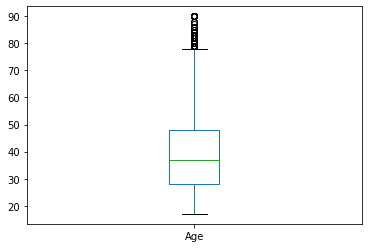

In [23]:
income['Age'].plot.box()

<AxesSubplot:>

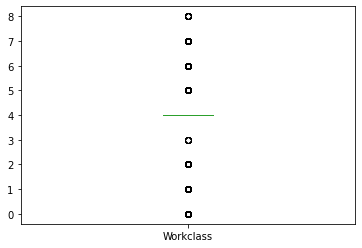

In [24]:
income['Workclass'].plot.box()

<AxesSubplot:>

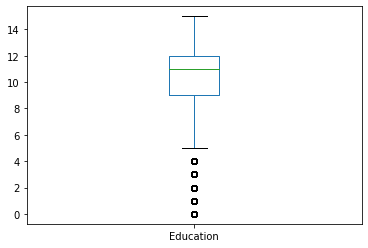

In [25]:
income['Education'].plot.box()

<AxesSubplot:>

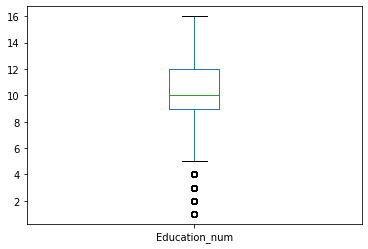

In [26]:
income['Education_num'].plot.box()

<AxesSubplot:>

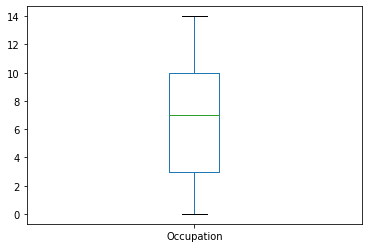

In [28]:
income['Occupation'].plot.box()

<AxesSubplot:>

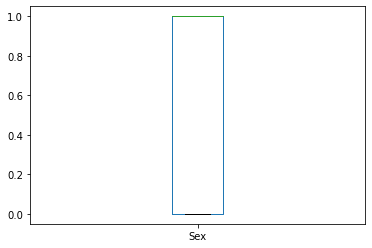

In [29]:
income['Sex'].plot.box()

<AxesSubplot:>

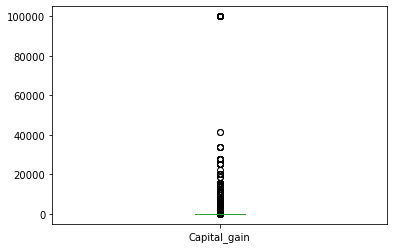

In [30]:
income['Capital_gain'].plot.box()

<AxesSubplot:>

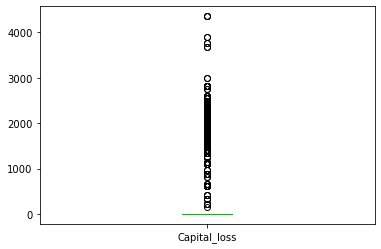

In [31]:
income['Capital_loss'].plot.box()

<AxesSubplot:>

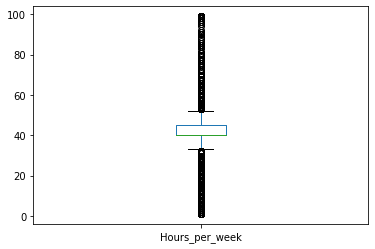

In [32]:
income['Hours_per_week'].plot.box()

<AxesSubplot:>

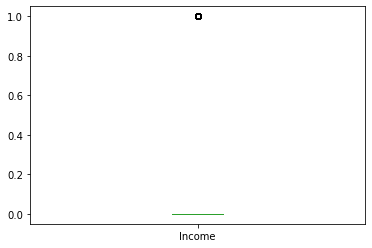

In [33]:
income['Income'].plot.box()

# Correlation

In [42]:
income.corr()

,Age,Workclass,Education,Education_num,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.003786,-0.036961,0.036527,-0.049629,0.088832,0.077674,0.057775,0.068756,0.234039
Workclass,0.003786,1.000000,0.014113,0.052015,0.277640,0.095942,0.033828,0.012231,0.138974,0.051645
Education,-0.036961,0.014113,1.000000,0.240749,-0.089358,-0.029302,0.021134,0.006173,0.022505,0.041858
Education_num,0.036527,0.052015,0.240749,1.000000,-0.283429,0.012256,0.122627,0.079932,0.148127,0.335182
Occupation,-0.049629,0.277640,-0.089358,-0.283429,1.000000,0.129602,-0.037871,-0.024096,0.030568,-0.092657
Sex,0.088832,0.095942,-0.029302,0.012256,0.129602,1.000000,0.048477,0.045572,0.229312,0.215995
Capital_gain,0.077674,0.033828,0.021134,0.122627,-0.037871,0.048477,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,0.012231,0.006173,0.079932,-0.024096,0.045572,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,0.138974,0.022505,0.148127,0.030568,0.229312,0.078409,0.054256,1.000000,0.229690
Income,0.234039,0.051645,0.041858,0.335182,-0.092657,0.215995,0.223333,0.150523,0.229690,1.000000


<AxesSubplot:>

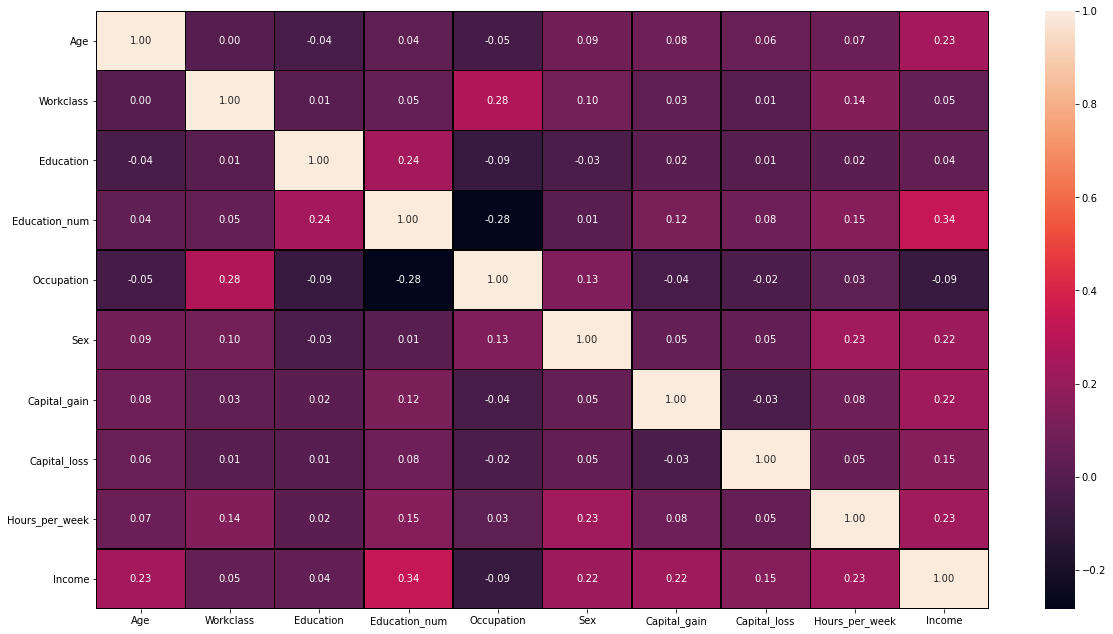

In [43]:
# Correlation using heatmap
plt.figure(figsize=(20,11))
sns.heatmap(income.corr(), annot = True, linewidth = .5, linecolor = 'black', fmt = '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='Age', ylabel='Density'>

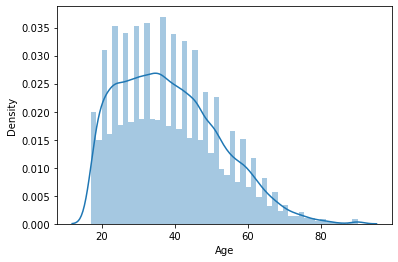

In [44]:
sns.distplot(income['Age'])

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

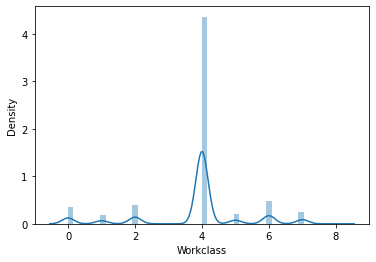

In [45]:
sns.distplot(income['Workclass'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

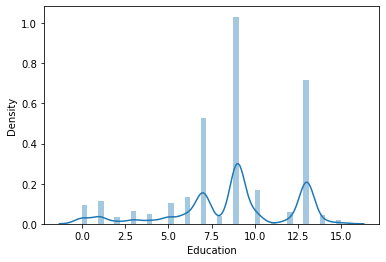

In [46]:
sns.distplot(income['Education'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

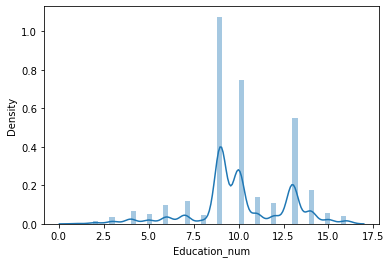

In [47]:
sns.distplot(income['Education_num'])

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

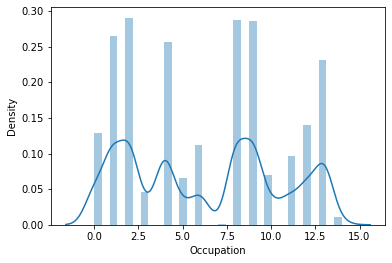

In [48]:
sns.distplot(income['Occupation'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

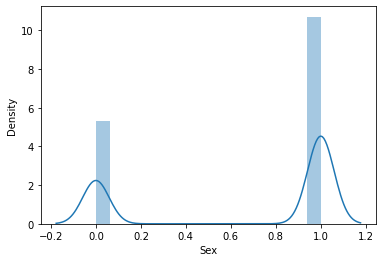

In [49]:
sns.distplot(income['Sex'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

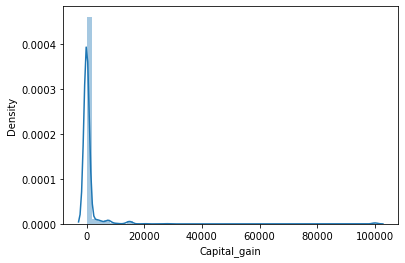

In [50]:
sns.distplot(income['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

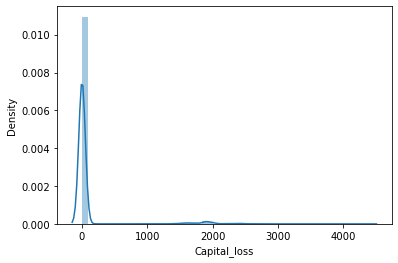

In [51]:
sns.distplot(income['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

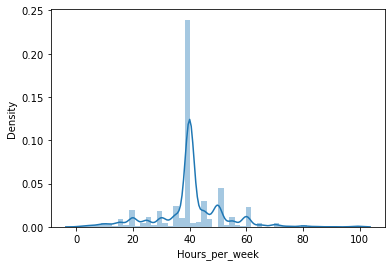

In [52]:
sns.distplot(income['Hours_per_week'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

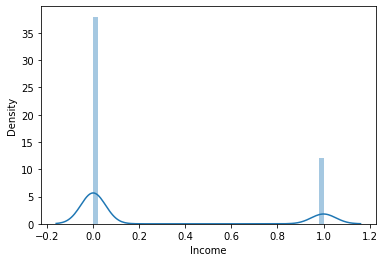

In [53]:
sns.distplot(income['Income'])

# Outliers

In [55]:
from scipy.stats import zscore
z = np.abs(zscore(income))
z

array([[0.83709708, 1.46388339, 0.48597383, ..., 0.21666301, 2.22212013,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.09045676, ..., 0.21666301, 0.03542999,
        0.5632099 ],
       [1.05703146, 0.09012148, 2.21526562, ..., 0.21666301, 0.03542999,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.09045676, ..., 0.21666301, 0.03542999,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.09045676, ..., 0.21666301, 1.65520046,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.09045676, ..., 0.21666301, 0.03542999,
        1.77553698]])

In [56]:
threshold = 3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32524, 32524, 32530], dtype=int64), array([8, 7, 8, ..., 0, 8, 8], dtype=int64))


In [57]:
income_new = income[(z<3).all(axis =1)]
print(income.shape)
print(income_new.shape)

(32560, 10)
(30150, 10)


# Divide Data in Feature & Vector

In [58]:
x = income_new.drop(['Income'], axis =1)
y = income_new['Income']

# Remove Skewness

In [60]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

x = power_transform(x , method = 'yeo-johnson')
print(x)

sc =StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.9316188   1.65702404 -0.55791017 ... -0.29667421 -0.03993217
  -2.21854598]
 [ 0.13349447  0.01796168  0.03682377 ... -0.29667421 -0.03993217
  -0.03632139]
 [ 1.10645925  0.01796168 -1.99452374 ... -0.29667421 -0.03993217
  -0.03632139]
 ...
 [ 1.38073209  0.01796168  0.03682377 ... -0.29667421 -0.03993217
  -0.03632139]
 [-1.33449245  0.01796168  0.03682377 ... -0.29667421 -0.03993217
  -1.7229872 ]
 [ 1.0490941   0.80400783  0.03682377 ...  3.37073637 -0.03993217
  -0.03632139]]
[[ 0.9316188   1.65702404 -0.55791017 ... -0.29667421 -0.03993217
  -2.21854598]
 [ 0.13349447  0.01796168  0.03682377 ... -0.29667421 -0.03993217
  -0.03632139]
 [ 1.10645925  0.01796168 -1.99452374 ... -0.29667421 -0.03993217
  -0.03632139]
 ...
 [ 1.38073209  0.01796168  0.03682377 ... -0.29667421 -0.03993217
  -0.03632139]
 [-1.33449245  0.01796168  0.03682377 ... -0.29667421 -0.03993217
  -1.7229872 ]
 [ 1.0490941   0.80400783  0.03682377 ...  3.37073637 -0.03993217
  -0.03632139]]


# Model

In [63]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 1 The model performs very well
Random_state:- 1
Training r2_score is:- 81.97346600331676
Testing r2_score is:- 82.00663349917082
At random state 10 The model performs very well
Random_state:- 10
Training r2_score is:- 82.01077943615257
Testing r2_score is:- 81.97346600331676
At random state 20 The model performs very well
Random_state:- 20
Training r2_score is:- 81.97761194029852
Testing r2_score is:- 81.97346600331676
At random state 30 The model performs very well
Random_state:- 30
Training r2_score is:- 81.90298507462687
Testing r2_score is:- 81.90713101160863
At random state 32 The model performs very well
Random_state:- 32
Training r2_score is:- 81.89883913764511
Testing r2_score is:- 81.89054726368158
At random state 36 The model performs very well
Random_state:- 36
Training r2_score is:- 81.90713101160863
Testing r2_score is:- 81.87396351575455
At random state 42 The model performs very well
Random_state:- 42
Training r2_score is:- 81.99004975124377
Testing r2_sc

At random state 902 The model performs very well
Random_state:- 902
Training r2_score is:- 81.93200663349917
Testing r2_score is:- 81.89054726368158
At random state 906 The model performs very well
Random_state:- 906
Training r2_score is:- 81.95273631840796
Testing r2_score is:- 81.97346600331676
At random state 908 The model performs very well
Random_state:- 908
Training r2_score is:- 81.97346600331676
Testing r2_score is:- 81.95688225538971
At random state 913 The model performs very well
Random_state:- 913
Training r2_score is:- 81.96517412935323
Testing r2_score is:- 82.02321724709785
At random state 931 The model performs very well
Random_state:- 931
Training r2_score is:- 81.96102819237147
Testing r2_score is:- 81.95688225538971
At random state 936 The model performs very well
Random_state:- 936
Training r2_score is:- 82.01492537313433
Testing r2_score is:- 82.02321724709785
At random state 938 The model performs very well
Random_state:- 938
Training r2_score is:- 81.973466003316

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 429)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4680
           1       0.23      0.14      0.17      1350

    accuracy                           0.70      6030
   macro avg       0.50      0.50      0.49      6030
weighted avg       0.65      0.70      0.67      6030



# Cross Validation Score

In [74]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 81.96019900497514
accuracy_score is:- 81.97346600331676


At cv:- 3
Cross validation score is:- 81.94361525704811
accuracy_score is:- 81.97346600331676


At cv:- 4
Cross validation score is:- 81.92372524078876
accuracy_score is:- 81.97346600331676


At cv:- 5
Cross validation score is:- 81.89054726368158
accuracy_score is:- 81.97346600331676


At cv:- 6
Cross validation score is:- 81.93034825870647
accuracy_score is:- 81.97346600331676


At cv:- 7
Cross validation score is:- 81.95027217496956
accuracy_score is:- 81.97346600331676


At cv:- 8
Cross validation score is:- 81.94361501865424
accuracy_score is:- 81.97346600331676


At cv:- 9
Cross validation score is:- 81.92703150912108
accuracy_score is:- 81.97346600331676




In [75]:
lsscore_selected = cross_val_score(lr,x,y,cv= 2).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.8196019900497513 
The accuracy score is:  0.8197346600331675


# Naive Bayes Classification

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [77]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

0.806799336650083


In [78]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[4030  650]
 [ 515  835]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4680
           1       0.56      0.62      0.59      1350

    accuracy                           0.81      6030
   macro avg       0.72      0.74      0.73      6030
weighted avg       0.81      0.81      0.81      6030



# SVC

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [80]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8311774461028192


In [81]:
from sklearn.svm import SVC
svc = SVC(kernel = 'poly')
svc.fit(x_train, y_train)

SVC(kernel='poly')

In [82]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8197346600331675


In [83]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [84]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 0.8106135986733002


# KNN Classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, ..., 1, 0, 0])

In [86]:
print(confusion_matrix(y_test, predknn))

[[4276  404]
 [ 707  643]]


In [87]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4680
           1       0.61      0.48      0.54      1350

    accuracy                           0.82      6030
   macro avg       0.74      0.69      0.71      6030
weighted avg       0.80      0.82      0.81      6030



# Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4680
           1       0.57      0.50      0.53      1350

    accuracy                           0.80      6030
   macro avg       0.71      0.69      0.70      6030
weighted avg       0.79      0.80      0.80      6030



Best Performing model is SVC

# AUC -ROC Curve

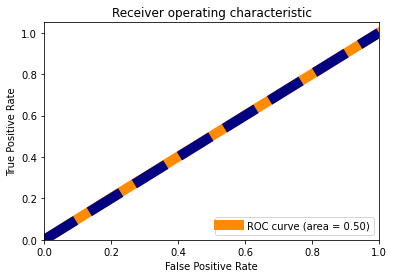

In [91]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

# Model Saving:

In [92]:
import pickle
import pickle
filename = 'Census_Income_project.pkl'
pickle.dump(svc, open(filename, 'wb'))

# Conclusion

In [93]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
con = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
con

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6025,0,0
6026,1,0
6027,0,1
6028,0,0
